# Three Observable Trends
1. Based on first scatter plot, most of tweets got neutal result.
2. Only CNN, CBS, Fox News have most positive tweets which results are between 0.75 to 1.
3. In the second bar chart, CBS got the highest average positive score 0.29, CNN got the higest negative score -0.084.

In [2]:
import tweepy
import json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from config import consumer_key, consumer_secret, access_token, access_token_secret
import pandas as pd
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [34]:
#Target User : news organizations: BBC, CBS, CNN, Fox, and New York times
target_user=["nytimes","BBCNews","CBS","CNN","FoxNews"]

# Variables for holding user tweet and sentiments
user_list=[]
tweetid_list=[]
tweet_text_list=[]
date_list=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_ago =[]
counter =0
counter_1=1 

for user in target_user:
    counter_1 = 1
    oldest_tweet = None
    for x in range(1,6):
        public_tweets = api.user_timeline(user, page=x,max_id = oldest_tweet)
        
        for tweet in public_tweets:
            
            tweetid = tweet["id"]
            tweet_text = tweet["text"]
            date = tweet["created_at"]
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet_text)
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            oldest_tweet = tweet["id"] - 1
            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            user_list.append(user)
            tweetid_list.append(tweetid)
            tweet_text_list.append(tweet_text)
            date_list.append(date)
            tweet_ago.append(counter_1)
            counter +=1
            counter_1 += 1
print(counter)
print(compound_list[5])
print(user_list[5])
print(tweetid_list[5])
print(positive_list[5])
print(tweet_text_list[5])
print(date_list[5])

500
-0.6369
nytimes
1023595287837851648
0.0
The Trump pick to lead the EPA's Superfund toxic waste program was Dow Chemical's lawyer during its own disputed di… https://t.co/xjIS08Okg1
Sun Jul 29 15:45:08 +0000 2018


In [36]:
#create a dataframe for result
result_df= pd.DataFrame ({"User":user_list, "TweetID":tweetid_list, "Date":date_list,"Tweet Text":tweet_text_list,"Compound Score":compound_list,
                         "Positive Score":positive_list,"Negative Score":negative_list,"Neutal Score": neutral_list,"Tweets Ago"
                         : tweet_ago})

#save in to a CSV file
result_df.to_csv("Media Tweet Sentiment Result.csv", index = False, header = True)
result_df.head(10)

,User,TweetID,Date,Tweet Text,Compound Score,Positive Score,Negative Score,Neutal Score,Tweets Ago
0,nytimes,1023614173866012677,Sun Jul 29 17:00:11 +0000 2018,A Palestinian teenager jailed in Israel for ki...,-0.4939,0.000,0.158,0.842,1
1,nytimes,1023613493931663360,Sun Jul 29 16:57:29 +0000 2018,Muslim children were repeatedly warned about t...,-0.2263,0.062,0.109,0.829,2
2,nytimes,1023606634654908416,Sun Jul 29 16:30:14 +0000 2018,"“Seventeen years after 9/11, we still haven’t ...",0.0000,0.000,0.000,1.000,3
3,nytimes,1023602832816128000,Sun Jul 29 16:15:07 +0000 2018,"For some, a proposed cap on services like Uber...",0.2960,0.120,0.062,0.817,4
4,nytimes,1023599070148026369,Sun Jul 29 16:00:10 +0000 2018,Pressed at his 2006 hearing to express an opin...,-0.5423,0.060,0.167,0.773,5
5,nytimes,1023595287837851648,Sun Jul 29 15:45:08 +0000 2018,The Trump pick to lead the EPA's Superfund tox...,-0.6369,0.000,0.215,0.785,6
6,nytimes,1023591524376961025,Sun Jul 29 15:30:11 +0000 2018,"“So many people think they know me,” says Cynt...",0.0000,0.000,0.000,1.000,7
7,nytimes,1023587717295296513,Sun Jul 29 15:15:03 +0000 2018,"For more than 2 decades, Jeff Loeffelholz was ...",-0.6705,0.000,0.200,0.800,8
8,nytimes,1023587334799929346,Sun Jul 29 15:13:32 +0000 2018,"RT @NYTimesPR: Statement of A.G. Sulzberger, P...",0.0000,0.000,0.000,1.000,9
9,nytimes,1023583968644481024,Sun Jul 29 15:00:10 +0000 2018,"When it gets cold in Bangkok, pet owners dress...",0.0000,0.000,0.000,1.000,10


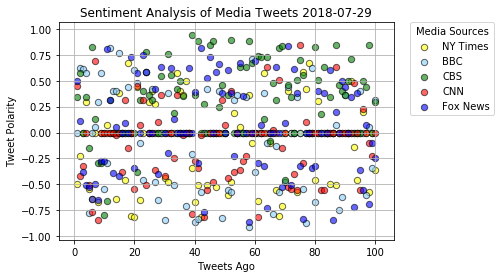

In [37]:
# seperate file by 5 target users
nytimes_result_df=result_df.loc[result_df["User"]=="nytimes",:]
bbc_result_df=result_df.loc[result_df["User"]=="BBCNews",:]
cbs_result_df=result_df.loc[result_df["User"]=="CBS",:]
cnn_result_df=result_df.loc[result_df["User"]=="CNN",:]
fox_result_df=result_df.loc[result_df["User"]=="FoxNews",:]
today = time.strftime("%Y-%m-%d", time.localtime())
#create plot
ax = nytimes_result_df.plot(kind = "scatter", x = "Tweets Ago", y ="Compound Score", c ='yellow',
                   s = 40 , grid = True, label = "NY Times",edgecolors="black",alpha =.6,
                   linewidths =1)
ax1 = bbc_result_df.plot(kind = "scatter", x = "Tweets Ago", y ="Compound Score", c ='lightskyblue',
                   s = 40 , grid = True, label = "BBC",edgecolors="black",alpha =.6,
                   linewidths =1, ax=ax)
ax2 = cbs_result_df.plot(kind = "scatter", x = "Tweets Ago", y ="Compound Score", c ='green',
                   s = 40 , grid = True, label = "CBS",edgecolors="black",alpha =.6,
                   linewidths =1 ,ax=ax)
ax3 = cnn_result_df.plot(kind = "scatter", x = "Tweets Ago", y ="Compound Score", c ='red',
                   s = 40 , grid = True, label = "CNN",edgecolors="black",alpha =.6,
                   linewidths =1 ,ax=ax)
ax4 = fox_result_df.plot(kind = "scatter", x = "Tweets Ago", y ="Compound Score", c ='blue',
                   s = 40 , grid = True, label = "Fox News",edgecolors="black",alpha =.6,
                   linewidths =1 ,ax=ax, title ="Sentiment Analysis of Media Tweets "+ today )
# Incorporate the other graph properties
ax.set_ylabel("Tweet Polarity")
# Create a legend

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = "Media Sources")

#save figure
plt.savefig("Sentiment Analysis of Media Tweets.png",bbox_inches = "tight",dpi =200)
plt.show()

In [48]:
#Group sentiment result by target user
user_result=result_df.groupby(["User"])
avg_compound=user_result["Compound Score"].mean()
avg_pos=user_result["Positive Score"].mean()
avg_neg=user_result["Negative Score"].mean()
avg_neu=user_result["Neutal Score"].mean()
summary_df = pd.DataFrame({"Compound":avg_compound, "Positive":avg_pos,"Negative":avg_neg,"Neutal":avg_neu})
#save as csv
summary_df.to_csv("Overall Media Sentiment Result.csv", index = True, header = True)
summary_df

,Compound,Positive,Negative,Neutal
User,,,,
BBCNews,-0.039912,0.07705,0.11742,0.80553
CBS,0.290213,0.14207,0.01470,0.84325
CNN,-0.083889,0.04403,0.07115,0.88481
FoxNews,0.043080,0.09353,0.08049,0.82600
nytimes,-0.083003,0.04505,0.07241,0.88253


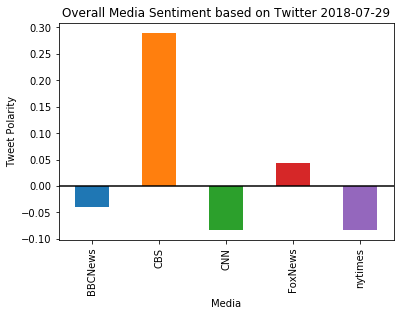

In [53]:
#create Bar Plot
summary_plot=avg_compound.plot(kind = 'bar',title="Overall Media Sentiment based on Twitter "+ today)
summary_plot.set_ylabel("Tweet Polarity")
summary_plot.set_xlabel("Media")
plt.hlines(0, -1, 11, alpha=1)
#save figure
plt.savefig("Overall Media Sentiment based on Twitter.png",bbox_inches = "tight",dpi =200)
plt.show()